In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon
from pandas import Timestamp, Timedelta

import emaremes as mrms

In [2]:
# Hourly data on a day during Hurricaine Helene
gzfiles = mrms.download.timerange(
    Timestamp("2024-09-26T12:00:00"),
    Timestamp("2024-09-28T00:00:00"),
    frequency=Timedelta(minutes=60),
)

In [3]:
# Define a dummy GeoDataFrame with airport names and their coordinates
polygons = {
    "Rect_0": Polygon.from_bounds(-85, 38, -83, 40),
    "Rect_1": Polygon.from_bounds(-85, 35, -83, 37),
    "Rect_2": Polygon.from_bounds(-85, 32, -83, 34),
}

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    polygons.keys(), geometry=list(polygons.values()), columns=["Rect"], crs="EPSG:4326"
)

gdf

,Rect,geometry
0,Rect_0,"POLYGON ((-85 38, -85 40, -83 40, -83 38, -85 ..."
1,Rect_1,"POLYGON ((-85 35, -85 37, -83 37, -83 35, -85 ..."
2,Rect_2,"POLYGON ((-85 32, -85 34, -83 34, -83 32, -85 ..."


In [4]:
gdf.explore(
    column="Rect",
    categorical=True,
    zoom_start=4,
    cmap="Dark2",
)

In [5]:
mrms.ts.polygon.query_single_file(gzfiles[0], gdf.set_index("Rect"))

(np.datetime64('2024-09-26T12:00:00.000000000'),
 {'Rect_0': 0.02553500048816204,
  'Rect_1': 2.0043349266052246,
  'Rect_2': 3.3940975666046143})

In [6]:
df = mrms.ts.polygon.query_files(gzfiles, gdf.set_index("Rect"))
df

,Rect_0,Rect_1,Rect_2
timestamp,,,
2024-09-26 12:00:00+00:00,0.025535,2.004335,3.394098
2024-09-26 13:00:00+00:00,0.050048,2.336812,3.984890
2024-09-26 14:00:00+00:00,0.054240,2.450260,3.343230
2024-09-26 15:00:00+00:00,0.167617,2.070517,3.131488
2024-09-26 16:00:00+00:00,0.321592,1.784028,3.234480
2024-09-26 17:00:00+00:00,0.316905,1.604585,3.798618
2024-09-26 18:00:00+00:00,0.217352,1.431218,4.528488
2024-09-26 19:00:00+00:00,0.164745,1.511670,5.032995
2024-09-26 20:00:00+00:00,0.264328,1.903473,4.187412


<Axes: xlabel='timestamp'>

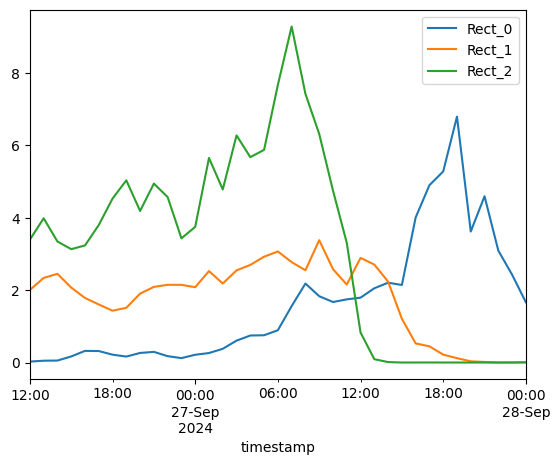

In [7]:
df.plot()